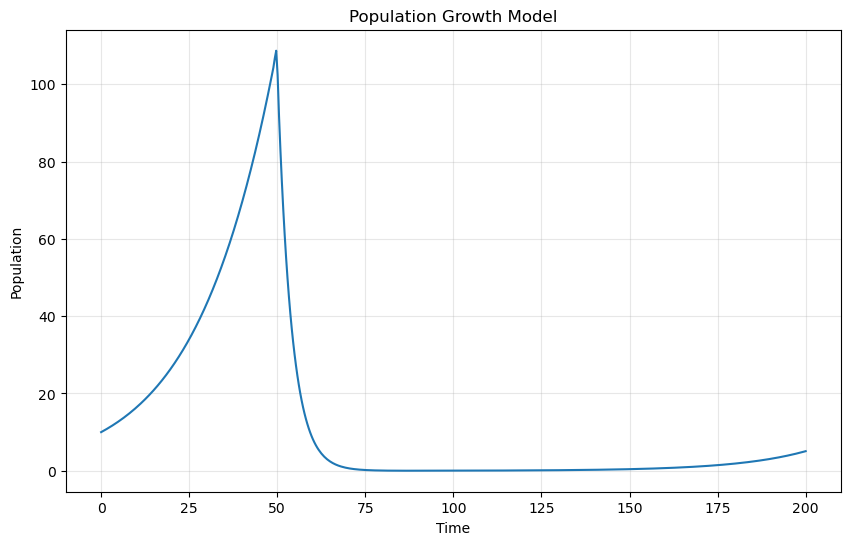

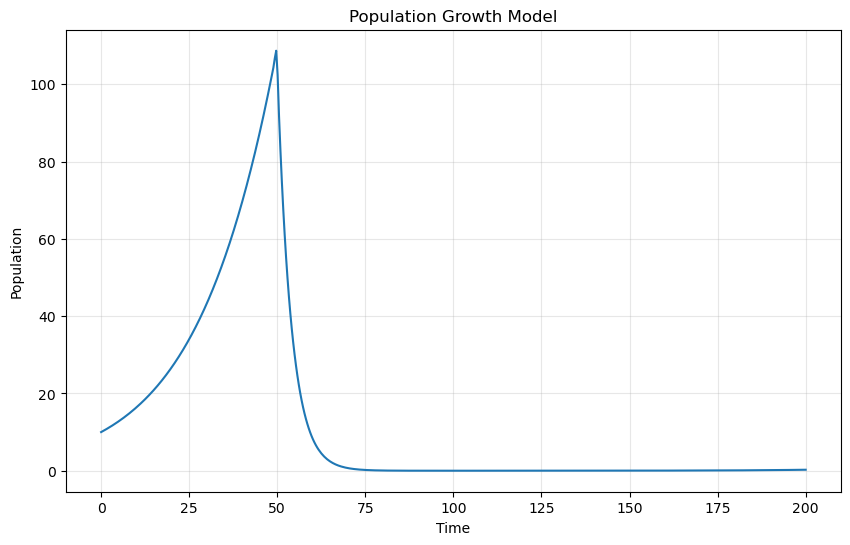

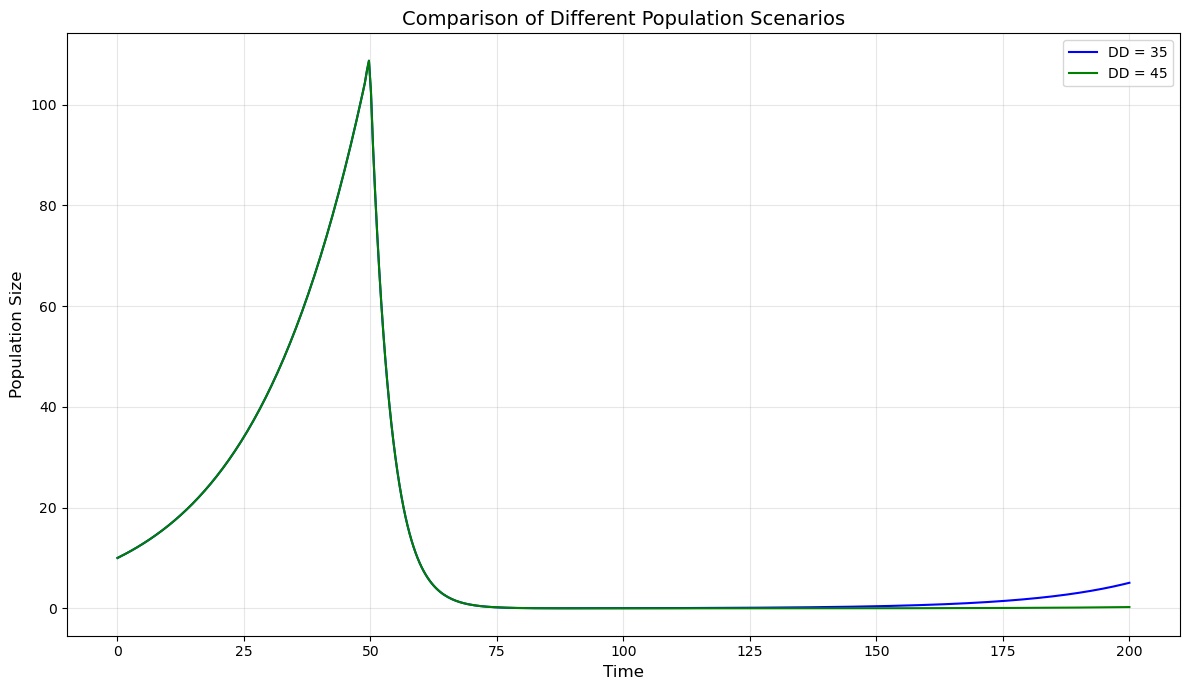

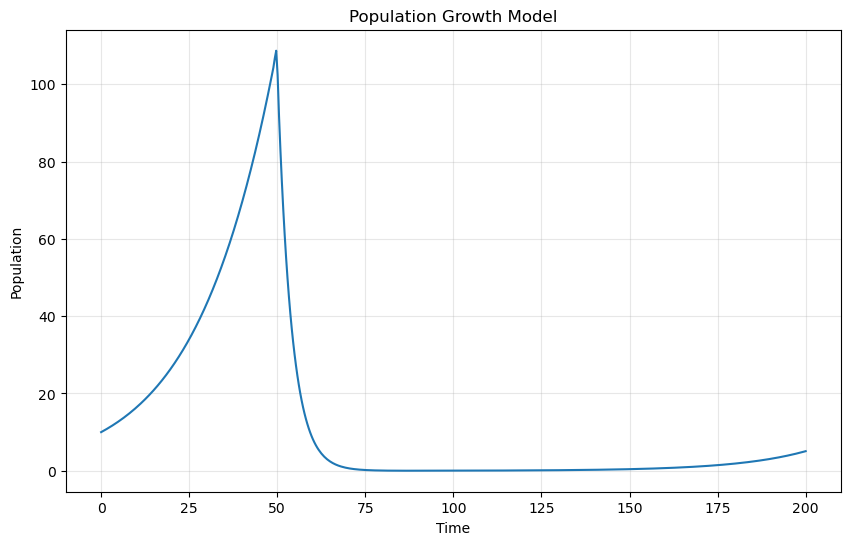

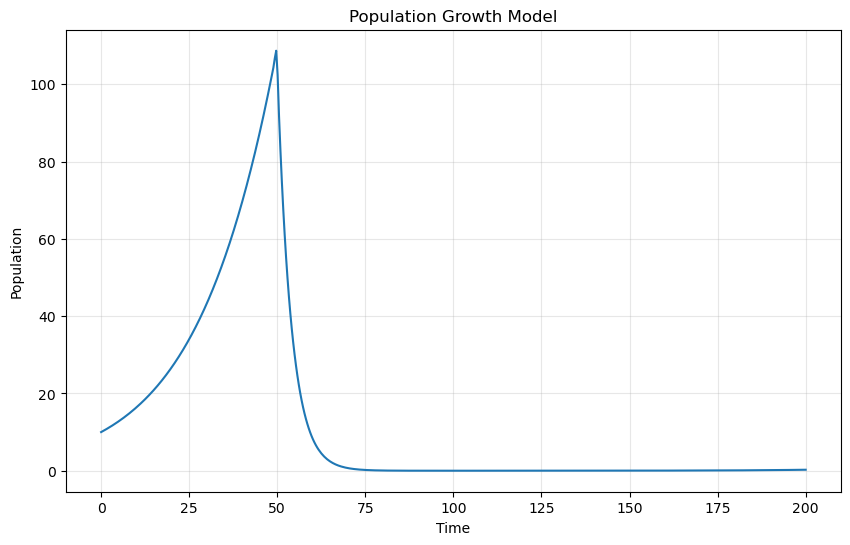

DD = 45: Extinct


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def population_model(time_span, initial_pop, params, plot=False):
    """
    Simulates population growth with various factors like competition and disease
    
    Parameters:
    time_span -- tuple of (start_time, end_time)
    initial_pop -- initial population size
    params -- dictionary of model parameters
    plot -- whether to plot the results
    
    Returns:
    t -- time points
    pop -- population at each time point
    """
    # Extract parameters
    r = params['growth_rate']
    K = params['carrying_capacity']
    c = params['competition_factor']
    d = params['disease_mortality']
    
    # Optional disease parameters
    disease_start = params.get('disease_start', float('inf'))
    disease_duration = params.get('disease_duration', 0)
    
    def model(t, y):
        # Basic logistic growth with competition
        growth = r * y * (1 - (y / K)**c)
        
        # Add disease effect if active
        disease = 0
        if disease_start <= t < disease_start + disease_duration:
            disease = d * y
            
        return growth - disease
    
    # Solve the differential equation
    solution = solve_ivp(
        model, 
        time_span, 
        [initial_pop], 
        t_eval=np.linspace(time_span[0], time_span[1], 500),
        method='RK45'
    )
    
    t = solution.t
    pop = solution.y[0]
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(t, pop)
        plt.grid(True, alpha=0.3)
        plt.xlabel('Time')
        plt.ylabel('Population')
        plt.title('Population Growth Model')
        plt.show()
        
    return t, pop

# Basic scenario with default parameters
basic_params = {
    'growth_rate': 0.05,
    'carrying_capacity': 1000,
    'competition_factor': 1,  # Standard logistic growth
    'disease_mortality': 0.3, 
    'disease_start': 50,        
    'disease_duration': 35  
}
t1, pop1 = population_model((0, 200), 10, basic_params, plot=True)

# High competition scenario
competition_params = {
    'growth_rate': 0.05,
    'carrying_capacity': 1000,
    'competition_factor': 1,  # Stronger competition
    'disease_mortality': 0.3,     # No disease
    'disease_start': 50,        # Disease starts at t=50
    'disease_duration': 45  
}
t2, pop2 = population_model((0, 200), 10, competition_params, plot=True)

# Comparing multiple scenarios on one plot
plt.figure(figsize=(12, 7))
plt.plot(t1, pop1, 'b-', label='DD = 35')
plt.plot(t2, pop2, 'g-', label='DD = 45')
plt.grid(True, alpha=0.3)   
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population Size', fontsize=12)
plt.title('Comparison of Different Population Scenarios', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

t1, pop1 = population_model((0, 200), 10, basic_params, plot=True)
if min(pop1) <= 0.01:  # Using a small threshold to detect extinction
    print("Population 1: Extinct")

t2, pop2 = population_model((0, 200), 10, competition_params, plot=True)
if min(pop2) <= 0.01:  # Using a small threshold to detect extinction
    print("DD = 45: Extinct")
